In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('D:\\Dataset\\audit_data\\audit_data\\audit_risk.csv',na_values='?')

In [ ]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [ ]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
data['Money_Value']=data['Money_Value'].fillna(data['Money_Value'].mean())

In [ ]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
data['LOCATION_ID']=data[np.isfinite(pd.to_numeric(data.LOCATION_ID, errors="coerce"))]


In [ ]:
data.iloc[352:357,:]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
352,1.99,1.99,0.76,0.2,0.152,0.0,0.2,0.0,0.76,5.0,...,0.4,0,0.2,0.0,2.2,4.544,0.4,0.5,0.9088,0
353,1.99,1.99,0.96,0.2,0.192,0.0,0.2,0.0,0.96,5.0,...,0.4,0,0.2,0.0,2.2,5.372,0.4,0.5,1.0744,1
354,1.99,1.99,1.26,0.4,0.504,0.0,0.2,0.0,1.26,5.0,...,0.4,0,0.2,0.0,2.2,1.904,0.4,0.5,0.3808,0
355,1.99,NaN,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0
356,1.99,1.99,0.29,0.2,0.058,0.0,0.2,0.0,0.29,5.0,...,0.4,0,0.2,0.0,2.0,1.470,0.4,0.5,0.2940,0


In [ ]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       3
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
data['LOCATION_ID']=data['LOCATION_ID'].fillna(data['LOCATION_ID'].value_counts().index[0])

In [ ]:
data.iloc[352:357,:]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
352,1.99,1.99,0.76,0.2,0.152,0.0,0.2,0.0,0.76,5.0,...,0.4,0,0.2,0.0,2.2,4.544,0.4,0.5,0.9088,0
353,1.99,1.99,0.96,0.2,0.192,0.0,0.2,0.0,0.96,5.0,...,0.4,0,0.2,0.0,2.2,5.372,0.4,0.5,1.0744,1
354,1.99,1.99,1.26,0.4,0.504,0.0,0.2,0.0,1.26,5.0,...,0.4,0,0.2,0.0,2.2,1.904,0.4,0.5,0.3808,0
355,1.99,55.57,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0
356,1.99,1.99,0.29,0.2,0.058,0.0,0.2,0.0,0.29,5.0,...,0.4,0,0.2,0.0,2.0,1.470,0.4,0.5,0.2940,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

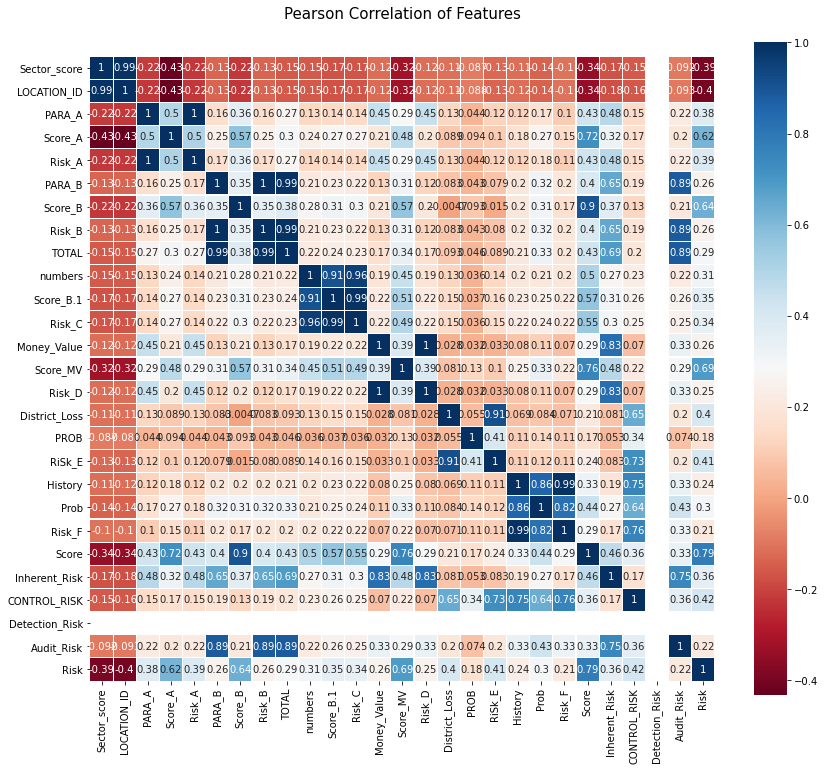

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X=data.drop(['Risk'],axis=1)
y=data['Risk']

In [ ]:
X=X.drop(['Detection_Risk'],axis=1)


In [ ]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))


            Specs        Score
21          Score  1251.057053
13       Score_MV   697.062565
6         Score_B   525.096291
3         Score_A   482.615387
23   CONTROL_RISK   162.422745
17         RiSk_E   158.060857
15  District_Loss   150.796460
1     LOCATION_ID   147.253692
0    Sector_score   142.344128
4          Risk_A   134.745387
2          PARA_A   129.632815
22  Inherent_Risk   113.068774
10      Score_B.1   110.749704
11         Risk_C   102.616866
9         numbers    81.202131


In [ ]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
print(df_imp_feat)
# print(rf_model.feature_importances_)


Audit_Risk       0.307321
Inherent_Risk    0.163926
Score            0.128897
TOTAL            0.103889
Risk_D           0.049276
Score_MV         0.047768
CONTROL_RISK     0.038111
Money_Value      0.038049
District_Loss    0.031870
PARA_B           0.024276
RiSk_E           0.023249
Risk_B           0.009668
PARA_A           0.009313
Score_A          0.007335
Score_B          0.005032
Risk_A           0.004820
LOCATION_ID      0.003444
Sector_score     0.001620
Score_B.1        0.000970
numbers          0.000565
dtype: float64


In [ ]:
data=data.drop(['PARA_B','Risk_B','TOTAL','Inherent_Risk','Detection_Risk'],axis=1)

In [ ]:
X=data.drop(['Risk'],axis=1)
y=data['Risk']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(2, 10, 2)), 'n_estimators': list(range(30, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# Fit the grid search model
grid_search.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 70, 90, 110, 130, 150, 170,
                                          190]})

In [ ]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=30, random_state=1)

In [ ]:
#Now let’s build the model using these optimized values.
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
i=1
kf = StratifiedKFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(x_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_train.iloc[train_index],x_train.iloc[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=2, n_estimators=30)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    



1 of kfold 5
accuracy_score 1.0

2 of kfold 5
accuracy_score 1.0

3 of kfold 5
accuracy_score 1.0

4 of kfold 5
accuracy_score 0.9907407407407407

5 of kfold 5
accuracy_score 1.0


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for testing---",accuracy_score(y_test,y_pred))

Accuracy Score for testing--- 1.0


<AxesSubplot:>

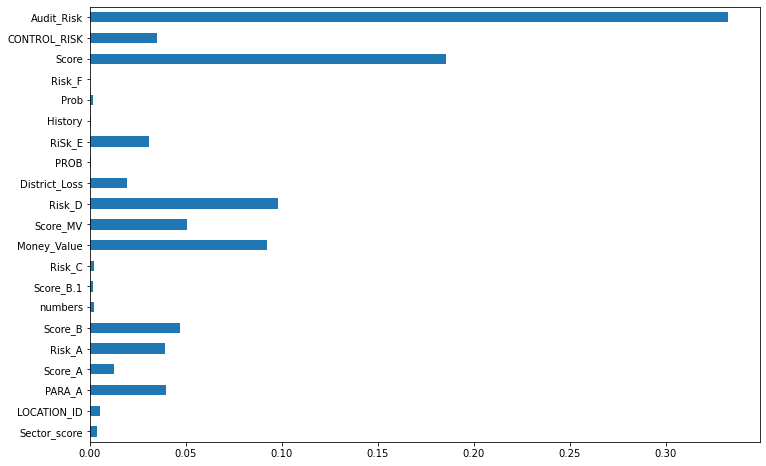

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
